Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

# Data Preprocessing

Reading the Training Dataset

In [ ]:
training_dataset = pd.read_csv("Google_Stock_Price_Train.csv")

Filter the Features and Convert the Training Set to Numpy

In [ ]:
training = training_dataset.iloc[:, 1:2].values

Feature Scaling

In [ ]:
# Use normalization from MinMaxScaler
# Feature Range -> The range of the output, 0 - 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training = scaler.fit_transform(training)

# Creating Timesteps for the RNN

Creating the Data Structures

In [ ]:
# Use 60 transactions (t - 60) to predict the next transaction (t + 1)  
x_train = []
y_train = []

In [ ]:
for i in range(60, 1258):
  x_train.append(scaled_training[i - 60: i, 0])
  y_train.append(scaled_training[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the Data Structure

Reshape

In [ ]:
# Shape of the dataset, which is the number of rows + timesteps (the number of columns)
# The number of predictors used in the predictions
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Creating the RNN

Initializing the RNN

In [ ]:
regressor = Sequential()

Adding LSTM Input Layers

In [ ]:
# Use dropout regularization to avoid overfitting
# Units -> Number of cells in the LSTM
# Return Sequences -> If Stacked LSTM, set to True, default False
# Input Shape -> The shape of the input array
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding Hidden Layers

In [ ]:
# Second Stack
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Third Stack
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Fourth Stack
# Set the last stack Return Sequences to False
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the Output Layer

In [ ]:
# Make fully-connected neurons
# Only one output neuron
regressor.add(Dense(units = 1))

Compiling the RNN

In [ ]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

# Training the RNN

Fit the Training Dataset

In [ ]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 104ms/step - loss: 0.1029
Epoch 2/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0039
Epoch 13/100

# Making Predictions

Load Test Dataset

In [ ]:
test_dataset = pd.read_csv("Google_Stock_Price_Test.csv")
real_prices = test_dataset.iloc[:, 1:2].values

Concat the Dataset

In [ ]:
all_dataset = pd.concat((training_dataset["Open"], test_dataset["Open"]), axis = 0)

Getting the Inputs

In [ ]:
# Getting Data inputs
data_inputs = all_dataset[len(all_dataset) - len(test_dataset) - 60:].values
# Scale the Data
data_inputs = data_inputs.reshape(-1, 1)
data_inputs = scaler.fit_transform(data_inputs)

x_test = []
for i in range(60, 80):
  x_test.append(data_inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Predict a Single Data

In [ ]:
# Predict the Inputs
predicted_prices = regressor.predict(x_test)
# Reinverse the Scale
predicted_prices = scaler.inverse_transform(predicted_prices)

Visualize the Results

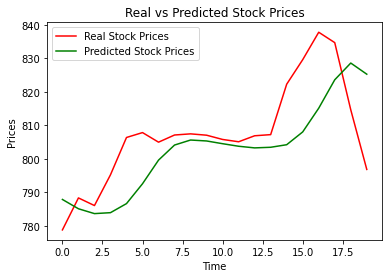

In [ ]:
# Real Prices Graph
plt.plot(real_prices, color = "red", label = "Real Stock Prices")
plt.plot(predicted_prices, color = "green", label = "Predicted Stock Prices")
plt.title("Real vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Prices")
plt.legend()
plt.show()

Notes

In [ ]:
# In the Classification Problem, when we tune the models, we used 'accuracy' as the metric.
# In Regression Problem, instead of `accuracy`, we should use the `neg_mean_squared_error` metric.